# Importing dataset -(Kaggle)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/test/surprise/PublicTest_78686873.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_58522921.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_83796714.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_84428313.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_87978901.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_90978621.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_27580582.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_15760011.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_49739228.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_5351857.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_56096676.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_71692098.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_64532931.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_17886908.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_21410542.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_68745885.jpg
/kaggle/input/fer2013/test/surpr

# Importing some necessary functions and libraries

In [2]:
import tensorflow as tf     #primary deep learning library
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for augmentation and image loading

#below are not needed if using transfer learning, needed to build network from scratch
# from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

import os             # used for working with paths of images
import cv2            # openCV for dealing with images

2024-03-31 08:27:10.582081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 08:27:10.582190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 08:27:10.720866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Checking the available classes

In [3]:
print("Training categories",os.listdir(r"/kaggle/input/fer2013/train"))
print("Testing categories",os.listdir(r"/kaggle/input/fer2013/test"))

Training categories ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Testing categories ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [4]:
category_list=os.listdir(r"/kaggle/input/fer2013/train")         # storing the available classes OR labels

In [5]:
import matplotlib.pyplot as plt             #matplotlib used for ploting images

# Visualizing traning samples

Visualizing category :  surprise --------------------------------------
/kaggle/input/fer2013/train/surprise/Training_66056468.jpg
Visualizing category :  fear --------------------------------------
/kaggle/input/fer2013/train/fear/Training_80689648.jpg
Visualizing category :  angry --------------------------------------
/kaggle/input/fer2013/train/angry/Training_52322132.jpg
Visualizing category :  neutral --------------------------------------
/kaggle/input/fer2013/train/neutral/Training_98425931.jpg
Visualizing category :  sad --------------------------------------
/kaggle/input/fer2013/train/sad/Training_89959053.jpg
Visualizing category :  disgust --------------------------------------
/kaggle/input/fer2013/train/disgust/Training_54996784.jpg
Visualizing category :  happy --------------------------------------
/kaggle/input/fer2013/train/happy/Training_65647822.jpg


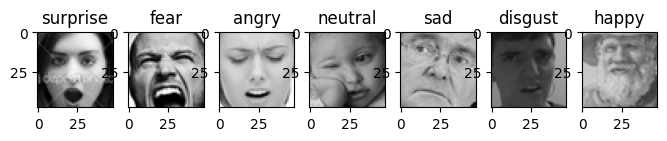

In [6]:
#picking one image from every class in training and visualizing it in a row side by side by using title to display img with label
train_base_dir="/kaggle/input/fer2013/train"
fig=plt.figure(figsize=(8,8))
i=1                                 
for category in category_list:                                                          #pick one category out of all
    print("Visualizing category : ",category,"--------------------------------------")
    category_path=os.path.join(train_base_dir,category)     #using os to create the path
    flag=False                                              #using false, later changing value to break out of loop
    for img_name in os.listdir(category_path):              #pick img_name from what are available in category folder
        if(flag):
            break                                           #checking if this is the first time
#         print(os.path.join(category_path,img_name))
        img_path=os.path.join(category_path,img_name)       #getting img_path by adding img_name and category_path
        img_bgr=cv2.imread(img_path)                        #reading img by opencv, default read in BGR format
        print(img_path)
        img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)     #matplotlib display img in RGB format so convert color
#         print(i)
        plt.subplot(1,7,i)                                  #subplot in a row(we already know it has 7 categories)
        plt.imshow(img_rgb)                                 #show img
        plt.title(category)                                 #add title                         
        flag=True                                           #changes val of flag so next time it breaks the loop
        i=i+1
plt.show() # display the result

In [7]:
#creating the imagedatagenerator, used to read and augment images
train_data_gen=ImageDataGenerator(
    rotation_range=10,             
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255)             #rescale -> normalize

In [8]:
test_data_gen=ImageDataGenerator(rescale=1./255)   #in real world test data is not given before hand, we never touch test data, only normalize it
                                                   #no augmentation, of couse not needed

In [9]:
#taking batches of images out of folder -> no burden on ram and cpu plus easier
train_data=train_data_gen.flow_from_directory(
    directory=train_base_dir,
    target_size=(224, 224),           #taking size as (224,224) as while using our fine tuning the arch has input shape as (224,244)
    class_mode='sparse',
    batch_size=32,
#     color_mode="grayscale"         # NO grayscale, the arch need 3 channel images ->(224,224,3)
)

Found 28709 images belonging to 7 classes.


In [10]:
train_data

In [11]:
test_data=test_data_gen.flow_from_directory(
    directory="/kaggle/input/fer2013/test",
    target_size=(224, 224),          #taking size as (224,224) as while using our fine tuning the arch has input shape as (224,244)
    class_mode='sparse',
    batch_size=32,                   # NO grayscale, the arch need 3 channel images ->(224,224,3)
#     color_mode="grayscale"
)

Found 7178 images belonging to 7 classes.


In [3]:
class_indices = train_data.class_indices
category_mapping = {v: k for k, v in class_indices.items()}
# {0: 'angry',
#  1: 'disgust',
#  2: 'fear',
#  3: 'happy',
#  4: 'neutral',
#  5: 'sad',
#  6: 'surprise'}

In [4]:
category_mapping

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

# Transfer learning (Fine Tuning) on VGG16

In [94]:
model=tf.keras.applications.MobileNetV3Large()

In [95]:
# display model summary
model.summary()

Model: "MobilenetV3large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, None,      │          0 │ input_layer_9[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, None,      │        432 │ rescaling_3[0][0] │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, None,      │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_63       │ (None, None,      │          0 │ conv_bn[0][0]     │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        144 │ activation_63[0]… │
│ (DepthwiseConv2D)   │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_57 (ReLU)     │ (None, None,      │          0 │ expanded_conv_de… │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        256 │ re_lu_57[0][0]    │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, None,      │          0 │ activation_63[0]… │
│ (Add)               │ None, 16)         │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, None,      │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, None,      │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_58 (ReLU)     │ (None, None,      │          0 │ expanded_conv_1_… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │          0 │ re_lu_58[0][0]    │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │        256 │ expanded_conv_1_

 Total params: 5,507,432 (21.01 MB)

 Trainable params: 5,483,032 (20.92 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [96]:
for layer in model.layers[:20]:
    layer.trainable = False

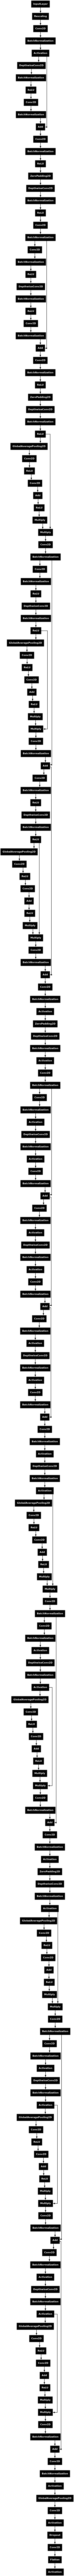

In [97]:
#for visualization ploting the model
tf.keras.utils.plot_model(model)

In [98]:
#total number of layers in the model
len(model.layers)

194

We need to cut off the model last layers, so that we can add our own layer acc to our requirement

In [99]:
#layer 1->index 0
model.layers[0]

<InputLayer name=input_layer_9, built=True>

In [100]:
model.layers[-1].output

<KerasTensor shape=(None, 1000), dtype=float32, sparse=False, name=keras_tensor_1186>

In [101]:
#adding some ANN layers at last
output=model.layers[-1].output
output=BatchNormalization()(output)
output=Dense(128)(output)
output=BatchNormalization()(output)
# output=Dense(64,activation="relu")(output)
output=Dense(7,activation="softmax")(output)

In [102]:
#saving new_model
new_model=tf.keras.Model(inputs=model.input, outputs=output)

In [103]:
# fine tuning needs smaller learning rates !!
from keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)

In [104]:
#compiling the model
new_model.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [105]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [107]:
#used to stop early if no improvement on test/validation data-> prevent overfitting 
earlystop=EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='min',
    restore_best_weights=True,
)
#reducing lear
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',       
    factor=0.2, 
    patience=3,
)

In [108]:
import warnings 
warnings.filterwarnings('ignore')   

In [109]:
history=new_model.fit(
    train_data,
    epochs=10,
    callbacks=[earlystop,reduce_lr],
    validation_data=test_data
)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 499s 502ms/step - accuracy: 0.3570 - loss: 1.7399 - val_accuracy: 0.1729 - val_loss: 2.0007 - learning_rate: 1.0000e-04
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 383s 423ms/step - accuracy: 0.5357 - loss: 1.2385 - val_accuracy: 0.2997 - val_loss: 1.7966 - learning_rate: 1.0000e-04
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 388s 429ms/step - accuracy: 0.5864 - loss: 1.1239 - val_accuracy: 0.3257 - val_loss: 1.7063 - learning_rate: 1.0000e-04
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 386s 426ms/step - accuracy: 0.6165 - loss: 1.0339 - val_accuracy: 0.4561 - val_loss: 1.4089 - learning_rate: 1.0000e-04
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 385s 426ms/step - accuracy: 0.6287 - loss: 0.9999 - val_accuracy: 0.5561 - val_loss: 1.1644 - learning_rate: 1.0000e-04
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 390s 431ms/step - accuracy: 0.6509 - loss: 0.9334 - val_accuracy: 0.5872 - val_loss: 1.1065 - learning_rate: 1.0000e-04
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 

Saving and exporting

In [110]:
new_model.save('my_model.h5')

In [5]:
import pickle

# Example dictionary
my_dict = {'a': 1, 'b': 2, 'c': 3}

# Define the file path
file_path = 'category_map.pkl'

# Write the dictionary to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(category_mapping, f)

print("Dictionary exported to", file_path)

Dictionary exported to category_map.pkl
